In [109]:
# improt package
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import rcParams
# set language
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

In [110]:
# import Shenzhen Component Index, arranging in ascending order of time
sz_index = pd.read_csv('data/sz_index.csv')
sz_index['date'] = pd.to_datetime(sz_index['date'], format='%Y%m%d')
sz_index = sz_index.sort_values('date', ascending=True)
sz_index = sz_index.reset_index(drop=True)

In [111]:
# import Shanghai Composite Index , arranging in ascending order of time
sh_index = pd.read_csv('data/sh_index.csv')
sh_index['date'] = pd.to_datetime(sh_index['date'], format='%Y%m%d')
sh_index = sh_index.sort_values('date', ascending=True)
sh_index = sh_index.reset_index(drop=True)


In [112]:
# check if there is null value
print(sh_index.isnull().sum())
print("_______________")
print(sz_index.isnull().sum())

date      0
close     0
open      0
high      0
low       0
vol       0
amount    0
dtype: int64
_______________
date      0
close     0
open      0
high      0
low       0
vol       0
amount    0
dtype: int64


In [113]:
print(sz_index.describe())
print("_____________")
print(sh_index.describe())

                                date         close          open  \
count                           7603   7603.000000   7603.000000   
mean   2006-10-21 18:12:04.450874624   6914.684320   6909.959361   
min              1991-04-03 00:00:00    402.500000    401.570000   
25%              1998-11-30 12:00:00   3131.983500   3130.520500   
50%              2006-10-30 00:00:00   5177.764000   5163.285000   
75%              2014-08-21 12:00:00  10523.205350  10506.636600   
max              2022-06-17 00:00:00  19531.155000  19554.581000   
std                              NaN   4435.807321   4432.797232   

               high           low           vol        amount  
count   7603.000000   7603.000000  7.603000e+03  7.603000e+03  
mean    6985.134362   6833.007944  9.016995e+07  1.167143e+08  
min      408.020000    397.670000  0.000000e+00  0.000000e+00  
25%     3165.445000   3105.751500  4.801548e+06  3.564068e+06  
50%     5229.120000   5093.886000  2.363563e+07  1.880067e+07  
75%

In [114]:
#check if the sizes are the same
if len(sz_index) == len(sh_index):
    print("They are the same")
else:
    print("They are not the same")

They are not the same


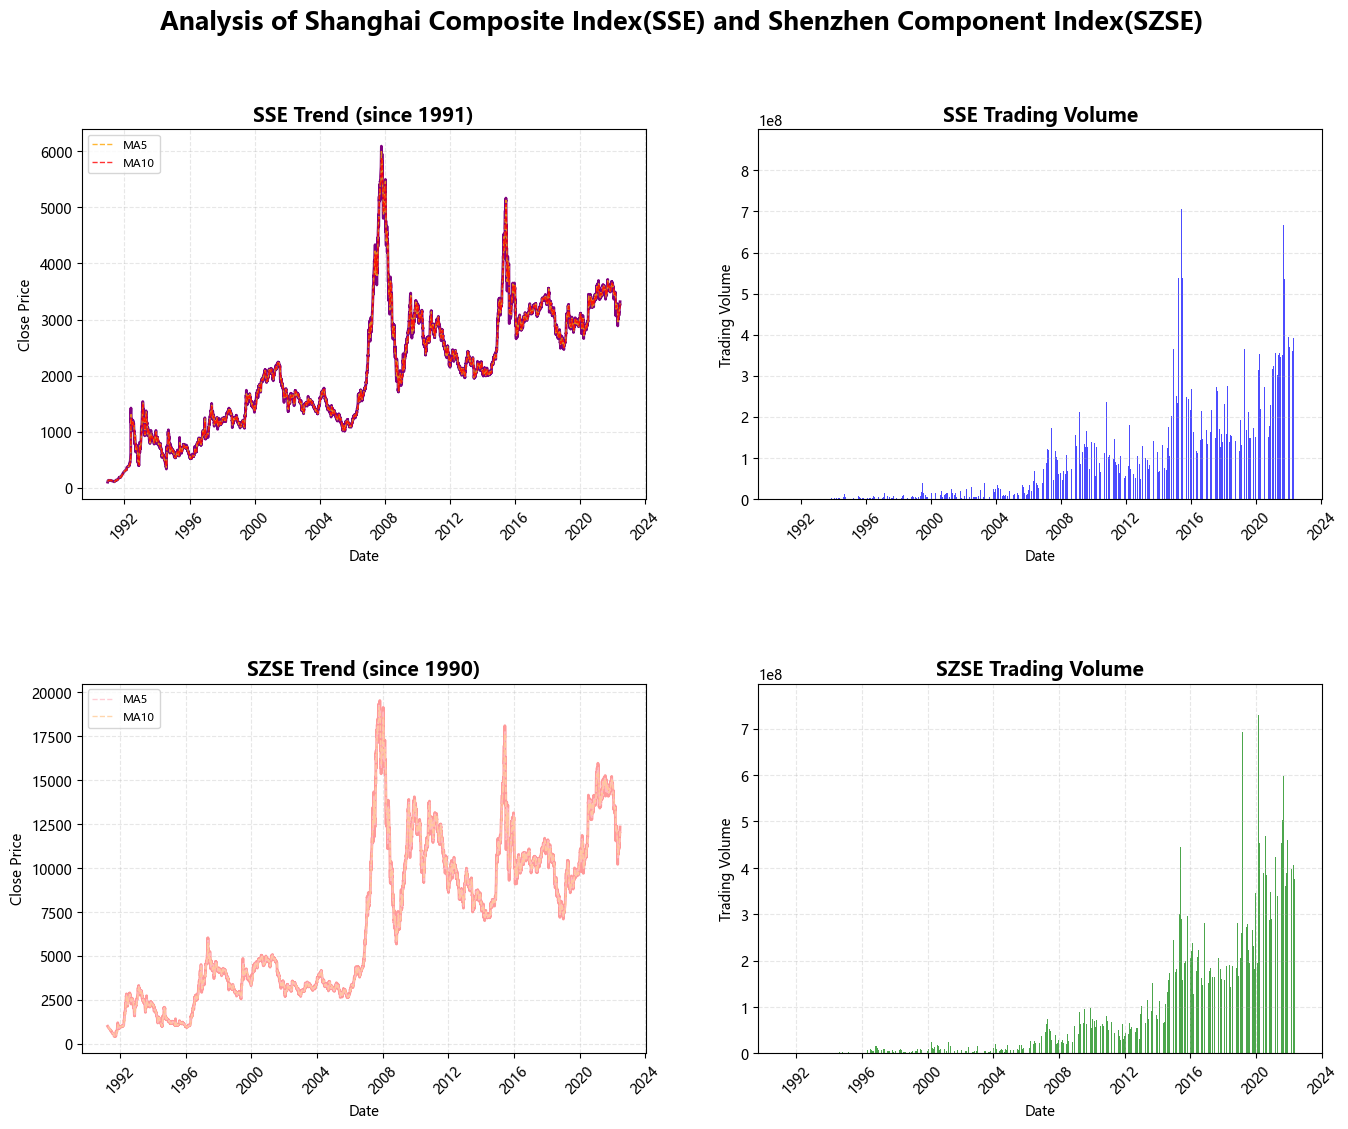

In [115]:
# Since the sizes of the data are different, draw the picture respectively
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Analysis of Shanghai Composite Index(SSE) and Shenzhen Component Index(SZSE)', fontsize=18, fontweight='bold')
fig.subplots_adjust(hspace=0.5)

# SSE Trend
ax1 = axes[0, 0]
ax1.plot(sh_index['date'], sh_index['close'], linewidth=2, color='purple')
ax1.set_title('SSE Trend (since 1991)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('Close Price', fontsize=10)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.tick_params(axis='x', rotation=45)

# 5-day and 10-day Moving Average of SSE
sh_index['MA5'] = sh_index['close'].rolling(window=5).mean()
sh_index['MA10'] = sh_index['close'].rolling(window=10).mean()
ax1.plot(sh_index['date'], sh_index['MA5'], '--', linewidth=1, color='orange', alpha=0.8, label='MA5')
ax1.plot(sh_index['date'], sh_index['MA10'], '--', linewidth=1, color='red', alpha=0.8, label='MA10')
ax1.legend(loc='upper left', fontsize=8)

# SSE trading volume
ax2 = axes[0, 1]
ax2.bar(sh_index['date'], sh_index['vol'], color='blue', alpha=0.7)
ax2.set_title('SSE Trading Volume', fontsize=14, fontweight='bold')
ax2.set_xlabel('Date', fontsize=10)
ax2.set_ylabel('Trading Volume', fontsize=10)
ax2.grid(True, alpha=0.3, linestyle='--', axis='y')
ax2.tick_params(axis='x', rotation=45)

# SZSE Trend
ax3 = axes[1, 0]
ax3.plot(sz_index['date'], sz_index['close'], linewidth=2, color='#ff9999')
ax3.set_title('SZSE Trend (since 1990)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Date', fontsize=10)
ax3.set_ylabel('Close Price', fontsize=10)
ax3.grid(True, alpha=0.3, linestyle='--')
ax3.tick_params(axis='x', rotation=45)

# 5-day and 10-day Moving Average of SZSE
sz_index['MA5'] = sz_index['close'].rolling(window=5).mean()
sz_index['MA10'] = sz_index['close'].rolling(window=10).mean()
ax3.plot(sz_index['date'],sz_index['MA5'], '--', linewidth=1, color='pink', alpha=0.8, label='MA5')
ax3.plot(sz_index['date'],sz_index['MA10'], '--', linewidth=1, color='#ffcc99', alpha=0.8, label='MA10')
ax3.legend(loc='upper left', fontsize=8)

# SZSE trading volume
ax4 = axes[1,1]
ax4.bar(sz_index['date'], sz_index['vol'], color='green', alpha=0.7)
ax4.set_title('SZSE Trading Volume', fontsize=14, fontweight='bold')
ax4.set_xlabel('Date', fontsize=10)
ax4.set_ylabel('Trading Volume', fontsize=10)
ax4.grid(True, alpha=0.3, linestyle='--')
ax4.tick_params(axis='x', rotation=45)

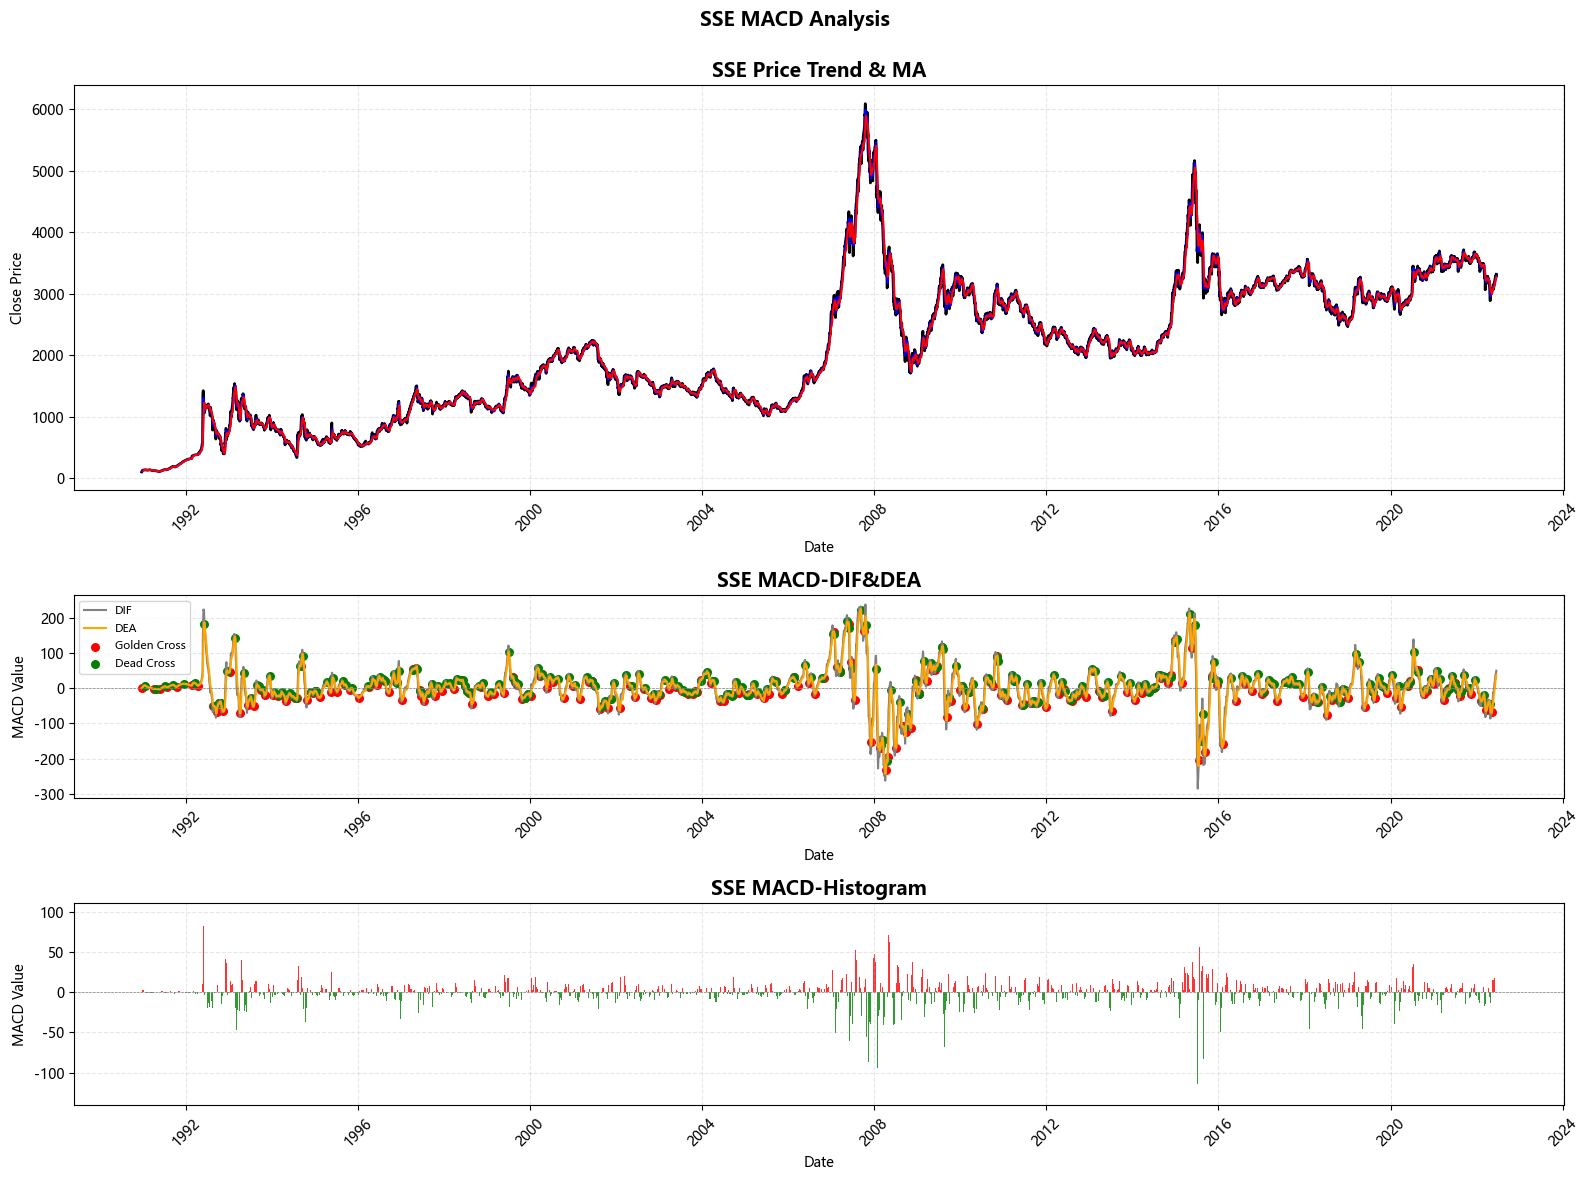

In [116]:
# MACD Visualization-for SSE

# definition to calculate MACD variables
def calculate_MACD(df,fast_period=12,slow_period=26,signal_period=9):
    #calculate fast ema and slow ema
    fast_ema = df['close'].ewm(span=fast_period, adjust = False).mean()
    slow_ema = df['close'].ewm(span=slow_period, adjust = False).mean()
    #DIF
    DIF = fast_ema-slow_ema
    #DEA
    DEA = DIF.ewm(span = signal_period, adjust = False).mean()
    #MACD histogram
    MACD_hist=DIF - DEA
    # return result
    df = df.copy()
    df['DIF'] = DIF
    df['DEA'] = DEA
    df['MACD_hist'] = MACD_hist
    return df

# SSE MACD data
sh_macd = calculate_MACD(sh_index,fast_period=12,slow_period=26,signal_period=9)
# SZSE MACD data
sz_macd = calculate_MACD(sz_index,fast_period=12,slow_period=26,signal_period=9)

# SSE MACD Analysis
fig, axes = plt.subplots(3,1,figsize=(16,12),gridspec_kw={'height_ratios':[2,1,1]})
fig.suptitle('SSE MACD Analysis', fontsize=14, fontweight='bold')
fig.subplots_adjust(hspace= 0.4)
sh_macd['MACD_signal'] = 0

# 1.price and MA
ax1 = axes[0]
ax1.plot(sh_macd['date'], sh_macd['close'],label = 'Close Price' , linewidth=2, color='black')
ax1.plot(sh_macd['date'], sh_macd['MA5'],label = '5-day MA' , linewidth=1.5, color='blue')
ax1.plot(sh_macd['date'], sh_macd['MA10'],label = '10-day MA' , linewidth=1.5, color='red')
ax1.set_title('SSE Price Trend & MA', fontsize=14, fontweight='bold')
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('Close Price', fontsize=10)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.tick_params(axis='x', rotation=45)

# 2.DIF&DEA
ax2 = axes[1]
ax2.plot(sh_macd['date'],sh_macd['DIF'],label = 'DIF' , linewidth=1.5, color='gray')
ax2.plot(sh_macd['date'],sh_macd['DEA'],label = 'DEA' , linewidth=1.5, color='orange')

# 3.golden cross and dead cross and set MACD trading signal
sh_macd['pre_DIF']=sh_macd['DIF'].shift(1)
sh_macd['pre_DEA']=sh_macd['DEA'].shift(1)

golden_cross = (sh_macd['pre_DIF']<=sh_macd['pre_DEA']) & (sh_macd['DIF']>sh_macd['DEA'])
dead_cross = (sh_macd['pre_DIF']>=sh_macd['pre_DEA']) & (sh_macd['DIF']<sh_macd['DEA'])

sh_macd.loc[golden_cross,'MACD_signal'] = 1
sh_macd.loc[dead_cross,'MACD_signal'] = -1

golden_dates = sh_macd.loc[golden_cross, 'date']
golden_dif = sh_macd.loc[golden_cross, 'DIF']
ax2.scatter(golden_dates, golden_dif, s=30, c='red', marker='o', label='Golden Cross')

dead_dates = sh_macd.loc[dead_cross, 'date']
dead_dif = sh_macd.loc[dead_cross, 'DIF']
ax2.scatter(dead_dates, dead_dif, s=30, c='green', marker='o', label='Dead Cross')


ax2.axhline(y=0,c="gray",linestyle='--',linewidth=0.5)
ax2.set_title('SSE MACD-DIF&DEA', fontsize=14, fontweight='bold')
ax2.set_xlabel('Date', fontsize=10)
ax2.set_ylabel('MACD Value', fontsize=10)
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(loc='upper left', fontsize=8)

# 3.MACD histogram
ax3 = axes[2]
colors =['red' if val>=0 else 'green' for val in sh_macd['MACD_hist']]
ax3.bar(sh_macd['date'],sh_macd['MACD_hist'],color=colors,alpha = 0.8,width=1)
ax3.axhline(y=0,c="gray",linestyle='--',linewidth=0.5)
ax3.set_title('SSE MACD-Histogram', fontsize=14, fontweight='bold')
ax3.set_xlabel('Date', fontsize=10)
ax3.set_ylabel('MACD Value', fontsize=10)
ax3.grid(True, alpha=0.3, linestyle='--')
ax3.tick_params(axis='x', rotation=45)


fig.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


In [117]:
# MACD Analyst - for SSE

# 1.Statistics of Buy and Sell Signals
buy_signals = (sh_macd['MACD_signal']==1).sum()
sell_signals = (sh_macd['MACD_signal']==-1).sum()
print(f'Number of SSE MACD golden crosses (buy signals):{buy_signals}')
print(f'Number of SSE MACD dead crosses (sell signals):{sell_signals}')

# 2. retruns after signals
if buy_signals>0:
    buy_returns=[]
    buy_dates=[]
    for i in sh_macd[sh_macd['MACD_signal']==1].index:
        if i+5 <len(sh_macd):
            future_return = (sh_macd['close'].iloc[i+5]/sh_macd['close'].iloc[i]-1)*100
            buy_returns.append(future_return)
            buy_dates.append(sh_macd['date'].iloc[i])
    if buy_returns:
        avg_return = np.mean(buy_returns).round(2)
        max_return = np.max(buy_returns).round(2)
        min_return = np.min(buy_returns).round(2)
        print(f"\n Statistics of 5-day return rate after the buy signal:")
        print(f'Average Return: {avg_return} %')
        print(f'Max Return: {max_return} %')
        print(f'Min Return: {min_return} %')


Number of SSE MACD golden crosses (buy signals):270
Number of SSE MACD dead crosses (sell signals):269

 Statistics of 5-day return rate after the buy signal:
Average Return: 0.48 %
Max Return: 59.73 %
Min Return: -16.65 %


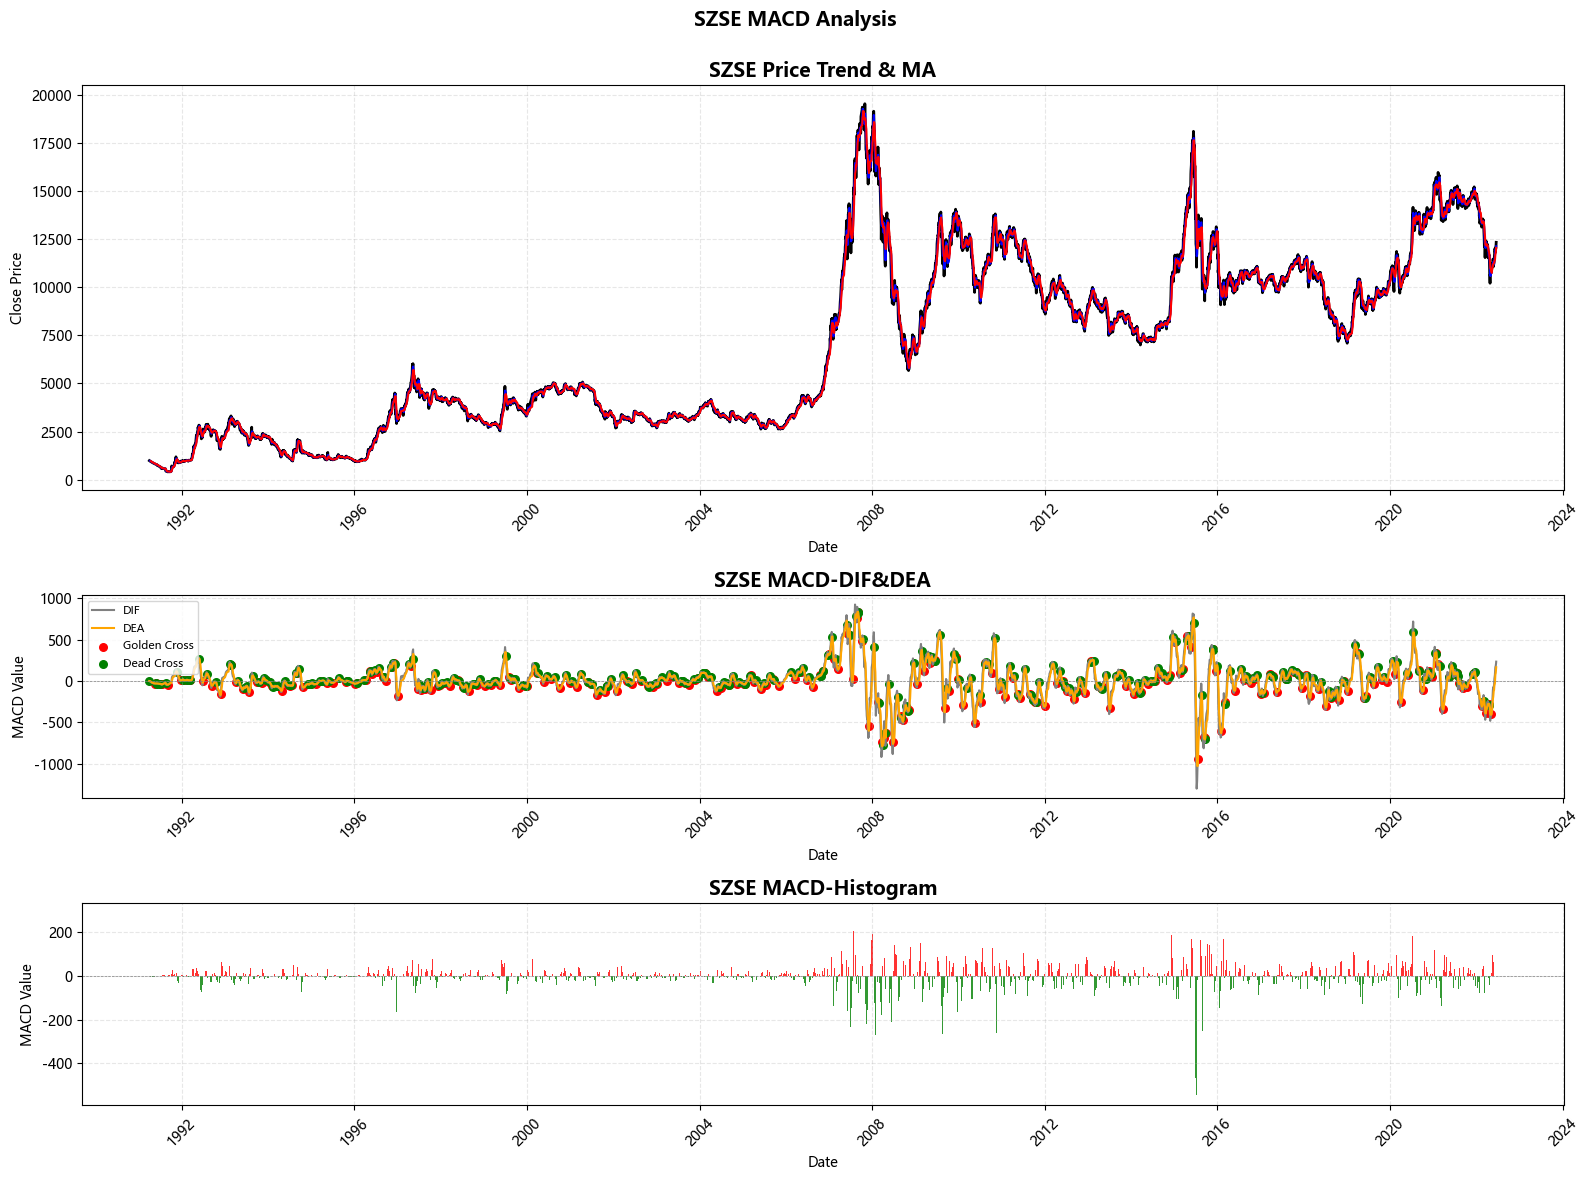

In [118]:
# MACD Visualization-for SZSE

# SSE MACD Analysis
fig, axes = plt.subplots(3,1,figsize=(16,12),gridspec_kw={'height_ratios':[2,1,1]})
fig.suptitle('SZSE MACD Analysis', fontsize=14, fontweight='bold')
fig.subplots_adjust(hspace= 0.4)
sz_macd['MACD_signal'] = 0
# 1.price and MA
ax1 = axes[0]
ax1.plot(sz_macd['date'], sz_macd['close'],label = 'Close Price' , linewidth=2, color='black')
ax1.plot(sz_macd['date'], sz_macd['MA5'],label = '5-day MA' , linewidth=1.5, color='blue')
ax1.plot(sz_macd['date'], sz_macd['MA10'],label = '10-day MA' , linewidth=1.5, color='red')
ax1.set_title('SZSE Price Trend & MA', fontsize=14, fontweight='bold')
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('Close Price', fontsize=10)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.tick_params(axis='x', rotation=45)
# 2.DIF&DEA
ax2 = axes[1]
ax2.plot(sz_macd['date'],sz_macd['DIF'],label = 'DIF' , linewidth=1.5, color='gray')
ax2.plot(sz_macd['date'],sz_macd['DEA'],label = 'DEA' , linewidth=1.5, color='orange')
# 3.golden cross and dead cross and set MACD trading signal
sz_macd['pre_DIF']=sz_macd['DIF'].shift(1)
sz_macd['pre_DEA']=sz_macd['DEA'].shift(1)

golden_cross = (sz_macd['pre_DIF']<=sz_macd['pre_DEA']) & (sz_macd['DIF']>sz_macd['DEA'])
dead_cross = (sz_macd['pre_DIF']>=sz_macd['pre_DEA']) & (sz_macd['DIF']<sz_macd['DEA'])

sz_macd.loc[golden_cross,'MACD_signal'] = 1
sz_macd.loc[dead_cross,'MACD_signal'] = -1

golden_dates = sz_macd.loc[golden_cross, 'date']
golden_dif = sz_macd.loc[golden_cross, 'DIF']
ax2.scatter(golden_dates, golden_dif, s=30, c='red', marker='o', label='Golden Cross')

dead_dates = sz_macd.loc[dead_cross, 'date']
dead_dif = sz_macd.loc[dead_cross, 'DIF']
ax2.scatter(dead_dates, dead_dif, s=30, c='green', marker='o', label='Dead Cross')



ax2.axhline(y=0,c="gray",linestyle='--',linewidth=0.5)
ax2.set_title('SZSE MACD-DIF&DEA', fontsize=14, fontweight='bold')
ax2.set_xlabel('Date', fontsize=10)
ax2.set_ylabel('MACD Value', fontsize=10)
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(loc='upper left', fontsize=8)
# 3.MACD histogram
ax3 = axes[2]
colors =['red' if val>=0 else 'green' for val in sz_macd['MACD_hist']]
ax3.bar(sz_macd['date'],sz_macd['MACD_hist'],color=colors,alpha = 0.8,width=1)
ax3.axhline(y=0,c="gray",linestyle='--',linewidth=0.5)
ax3.set_title('SZSE MACD-Histogram', fontsize=14, fontweight='bold')
ax3.set_xlabel('Date', fontsize=10)
ax3.set_ylabel('MACD Value', fontsize=10)
ax3.grid(True, alpha=0.3, linestyle='--')
ax3.tick_params(axis='x', rotation=45)


fig.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

In [120]:
# MACD Analyst - for SZSE

# 1.Statistics of Buy and Sell Signals
buy_signals = (sz_macd['MACD_signal']==1).sum()
sell_signals = (sz_macd['MACD_signal']==-1).sum()
print(f'Number of SZSE MACD golden crosses (buy signals):{buy_signals}')
print(f'Number of SZSE MACD dead crosses (sell signals):{sell_signals}')

# 2. retruns after signals
if buy_signals>0:
    buy_returns=[]
    buy_dates=[]
    for i in sz_macd[sz_macd['MACD_signal']==1].index:
        if i+5 <len(sz_macd):
            future_return = (sz_macd['close'].iloc[i+5]/sz_macd['close'].iloc[i]-1)*100
            buy_returns.append(future_return)
            buy_dates.append(sz_macd['date'].iloc[i])
    if buy_returns:
        avg_return = np.mean(buy_returns).round(2)
        max_return = np.max(buy_returns).round(2)
        min_return = np.min(buy_returns).round(2)
        print(f"\n Statistics of 5-day return rate after the buy signal:")
        print(f'Average Return: {avg_return} %')
        print(f'Max Return: {max_return} %')
        print(f'Min Return: {min_return} %')

Number of SZSE MACD golden crosses (buy signals):275
Number of SZSE MACD dead crosses (sell signals):275

 Statistics of 5-day return rate after the buy signal:
Average Return: -0.06 %
Max Return: 15.07 %
Min Return: -12.38 %
